In [ ]:
### Documentation:
#### Data Set:7.xor


### Data Description:
The dataset consists of three columns and 500 rows which includes two feature columns and one label column.
Features columns are in the form of float and continuous values ranges from [-2.659172 to 2.696224] and [-3.046143 to 2.759355] and the means are at [-0.065366 and -0.025148].
Whereas label is in the form discrete numerical int values that inclueds [0 and 1]. 50% of the data consists of 0 and rest consists of 1 as labels.
There are zero duplicates and no null values consists in the dataset.
Pattern that is formed by the input features is linear separatering. That means a liner line is separating 0 label and 1 label.

### Importing Libraries: The required libraries are imported at the beginning of the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at"C:\\Users\\dell\\Downloads\\Deep Learning data\\7.xor.csv". The dataset is stored in the DataFrame df.

In [2]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\7.xor.csv",header = None)
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [3]:
df[2]

0     -1.0
1     -1.0
2      1.0
3      1.0
4      1.0
      ... 
495   -1.0
496    1.0
497   -1.0
498    1.0
499   -1.0
Name: 2, Length: 500, dtype: float64

#### Have done mapping for -ve(-1.0) as 0 and for +ve (1.0) as 1

In [4]:
c_l = df.iloc[:,2]
df[2] = c_l.map({-1.0:0,1.0:1})
df[2]

0      0
1      0
2      1
3      1
4      1
      ..
495    0
496    1
497    0
498    1
499    0
Name: 2, Length: 500, dtype: int64

#### Gives the dimensions of the dataset (number of rows, number of columns).


In [5]:
df.shape

(500, 3)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [7]:
df.describe()

,0,1,2
count,500.000000,500.000000,500.0000
mean,-0.065366,-0.025148,0.4800
std,0.974521,1.000935,0.5001
min,-2.659172,-3.046143,0.0000
25%,-0.726459,-0.680994,0.0000
50%,-0.094417,-0.034669,0.0000
75%,0.593690,0.609228,1.0000
max,2.696224,2.759355,1.0000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [10]:
df[2].value_counts()

0    260
1    240
Name: 2, dtype: int64

### Data Visualization:
A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

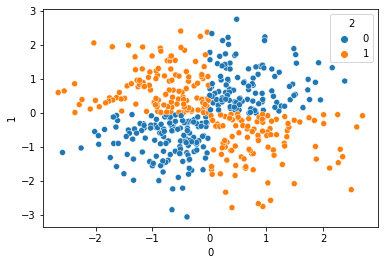

In [11]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 20% of the total dataset.

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [13]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_trainf=std.fit_transform(X_train)
X_testf=std.transform(X_test)

### Importing necessary libraries:
- TensorFlow and Keras are libraries.
- Sequential is a linear stack of neural network layers.
- Dense represents a fully connected layer.

In [14]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Model Architecture:

- The model is defined as a sequential model, which means that the layers are stacked sequentially.
- The first layer is a dense layer with 5 units, ReLU activation function, and 'he_uniform' kernel initializer. It takes an input of dimension 2.
- The second layer is also a dense layer with 4 units, ReLU activation function, and 'he_uniform' kernel initializer.
- The third layer is a dense layer with 3 units, ReLU activation function, and 'he_uniform' kernel initializer.
- The final layer is a dense layer with 1 unit, sigmoid activation function. This layer outputs a single value between 0 and 1, representing the probability of the input belonging to a certain class.

In [38]:
model=Sequential()
model.add(Dense(5,activation="relu",kernel_initializer='he_uniform',input_dim=2))

model.add(Dense(4,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(3,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(1,activation="sigmoid"))

### Model Weights:

The model.get_weights() function returns the current weights of the model. 


In [39]:
model.get_weights()

[array([[-0.91601664, -1.5174742 ,  0.41443765, -0.16858518,  1.5442587 ],
        [-0.8586748 , -0.55013776,  0.5784627 , -1.4799776 , -1.6226438 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5916482 , -0.32228202,  0.29552305,  0.2879305 ],
        [ 0.209499  ,  0.41311145, -0.6258169 , -0.69653225],
        [-0.14137608, -0.11617535, -0.5064651 , -0.7042212 ],
        [ 0.5266447 ,  0.3568213 ,  0.7420267 ,  0.9694557 ],
        [-0.8403244 , -0.5515718 ,  0.37307262, -0.47880936]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-1.0278772 ,  1.1012751 , -0.29198265],
        [-0.62004715, -1.0570788 ,  1.100773  ],
        [ 0.30512977,  0.8013121 , -0.5850382 ],
        [ 0.33081567,  0.6068449 ,  0.8865961 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.08569992],
        [-1.2076745 ],
        [ 0.23447001]], dtype=float32),
 array([0.], dtype=float32)]

### Model Summary:

The model.summary() function prints a summary of the model architecture, including the layer types, output shape, and the number of parameters in each layer.

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 15        
                                                                 
 dense_10 (Dense)            (None, 4)                 24        
                                                                 
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


### Compilation:

- The model.compile() function configures the model for training.
- It uses the Adam optimizer, which is a popular optimization algorithm for deep learning models.
- The loss function is set to "binary_crossentropy", which is commonly used for binary classification problems.
- The model will also compute the "accuracy" metric during training.

In [41]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Training:

- The model.fit() function is used to train the model.
- It takes the training data X_trainf and y_train as inputs.
- The batch size is set to 10, which means the model will be updated after processing 10 samples at a time.
- The number of epochs is set to 50, indicating the number of times the model will iterate over the entire training dataset.
- A validation split of 0.2 means that 20% of the training data will be used as a validation set to monitor the model's performance during training.
- The training history is stored in the history variable, which can be used to analyze the training progress and visualize metrics like loss and accuracy.

In [42]:
history=model.fit(X_trainf,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 1s 6ms/step - loss: 0.9127 - accuracy: 0.4972 - val_loss: 0.7717 - val_accuracy: 0.4000
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.4833 - val_loss: 0.7344 - val_accuracy: 0.4444
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7887 - accuracy: 0.5056 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.5556 - val_loss: 0.6594 - val_accuracy: 0.5444
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6028 - val_loss: 0.6376 - val_accuracy: 0.5889
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6167 - val_loss: 0.6180 - val_accuracy: 0.6111
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6250 - val_loss: 0.6029 - val_accuracy: 0.6222
Epoch 8/50
36/36 [==

### Plotting the decision regions for the training data:
- The plot_decision_regions function from the mlxtend library to visualize the decision regions of the model on the training data. 
- The data points are plotted, and the decision regions are highlighted.
- The title, x-label, and y-label are set accordingly.

In [66]:
from mlxtend.plotting import plot_decision_regions as pt

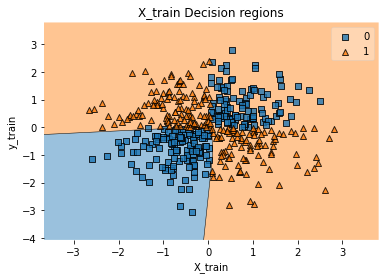

In [67]:
pt(X_trainf,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions")
plt.xlabel("X_train",color='black')
plt.ylabel("y_train",color='black')
plt.show()

### Making predictions on the test data and calculating accuracy:
- The model is used to predict the outputs (y_pred) for the test data (X_tests).
- The predicted values are then thresholded at 0.5 to obtain binary predictions (y_predf).

In [43]:
y_cap=model.predict(X_testf)

In [63]:
y_capf = np.array([1 if x>0.5 else 0 for x in y_cap])

#### Computing the accuracy of the predictions is calculated using the accuracy_score function from scikit-learn by comparing the predicted values (y_predf) with the true values (y_test).

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.78

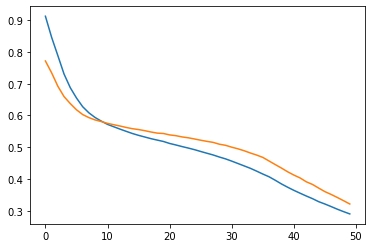

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Plotting the decision regions for the test data:
- The decision regions of the model on the test data (X_tests). 
- The data points are plotted, and the decision regions are shown. 
- The title, x-label, and y-label are set accordingly.

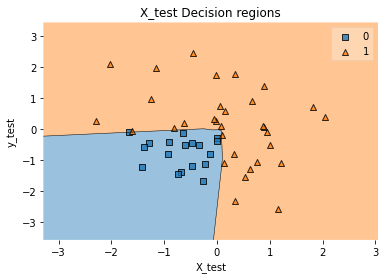

In [72]:
plot_decision_regions(X_testf,y_capf,clf=model)
plt.title("X_test Decision regions")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.show()